# Random Forest Exercise
## Customer Segmentation Classification

Dataset [here](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation)

In [25]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_curve

### Dataset overview

In [2]:
#Dataset
#I had joined Test.csv and Train.csv previously into one file

data = pd.read_csv('customer.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [4]:
#ID won't matter for segmentation, so I'll remove them
data.drop(columns=['ID'],axis=1,inplace=True)

In [5]:
data.shape

(10695, 10)

In [6]:
#Check NA
data.isna().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

For boolean variables, I interpret that missing values mean "No" or "False"

For floats and intergers, I interpret that the missing values mean "zero"

For Var_1, I'll drop the missing rows

In [7]:
data.Ever_Married.value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [8]:
data.Ever_Married.fillna("No",inplace=True)

In [9]:
data.Graduated.value_counts()

Yes    6570
No     4023
Name: Graduated, dtype: int64

In [10]:
data.Graduated.fillna("No",inplace=True)

In [11]:
data.Profession.value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [12]:
data.Profession.fillna("Other",inplace=True)

In [13]:
data.Work_Experience.fillna(0,inplace=True)

In [14]:
data.Family_Size.value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [15]:
data.Family_Size.fillna(1,inplace=True)

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [18]:
data.shape

(10587, 10)

In [19]:
#Convert those variables into integers
data['Work_Experience'] = data['Work_Experience'].astype('int')
data['Family_Size'] = data['Family_Size'].astype('int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10587 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           10587 non-null  object
 1   Ever_Married     10587 non-null  object
 2   Age              10587 non-null  int64 
 3   Graduated        10587 non-null  object
 4   Profession       10587 non-null  object
 5   Work_Experience  10587 non-null  int64 
 6   Spending_Score   10587 non-null  object
 7   Family_Size      10587 non-null  int64 
 8   Var_1            10587 non-null  object
 9   Segmentation     10587 non-null  object
dtypes: int64(3), object(7)
memory usage: 909.8+ KB


In [21]:
#Max values
data.max()

Gender              Male
Ever_Married         Yes
Age                   89
Graduated            Yes
Profession         Other
Work_Experience       14
Spending_Score       Low
Family_Size            9
Var_1              Cat_7
Segmentation           D
dtype: object

In [22]:
#Min values
data.min()

Gender              Female
Ever_Married            No
Age                     18
Graduated               No
Profession          Artist
Work_Experience          0
Spending_Score     Average
Family_Size              1
Var_1                Cat_1
Segmentation             A
dtype: object

In [23]:
data.describe().round(2)

,Age,Work_Experience,Family_Size
count,10587.00,10587.00,10587.00
mean,43.51,2.35,2.77
std,16.76,3.31,1.55
min,18.00,0.00,1.00
25%,30.00,0.00,2.00
50%,41.00,1.00,2.00
75%,53.00,3.00,4.00
max,89.00,14.00,9.00


In [24]:
#Random Forests only work with numbers, so I'll have to do one-hot encoding here

#Replace 'Yes' to 1 and 'No' to 0
data.replace(to_replace='Yes',value=1,inplace=True)
data.replace(to_replace='No',value=0,inplace=True)

In [28]:
data['Gender'] = data['Gender'].replace(['Female'],1)
data['Gender'] = data['Gender'].replace(['Male'],0)

In [29]:
#"Hard" Label Encoding
data['Spending_Score'] = data['Spending_Score'].replace(['Low'],0)
data['Spending_Score'] = data['Spending_Score'].replace(['Average'],1)
data['Spending_Score'] = data['Spending_Score'].replace(['High'],2)

In [30]:
#For the other categorical variables, I'll LabelEncoder
label_encoder = preprocessing.LabelEncoder()
data['Profession'] = label_encoder.fit_transform(data['Profession'])
data['Var_1'] = label_encoder.fit_transform(data['Var_1'])
data['Segmentation'] = label_encoder.fit_transform(data['Segmentation'])

In [31]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,61,1,4,1,2,3,5,2
1,1,1,63,1,4,0,2,5,5,2
2,0,1,39,1,0,0,1,3,5,2
3,0,0,23,0,5,1,0,4,5,3
4,0,0,18,0,5,7,0,4,5,3


As this is a fake dataset for training purposes and the values above look fine, I won't do outliers detection

For real life cases, it is better to check and treat outliers, although there is a discussion regarding if Random Forests are robust to outliers

### Training

In [32]:
X = data[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']]

In [33]:
y = data['Segmentation']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

To choose the number of estimators below, I used this reference [here](https://crunchingthedata.com/number-of-trees-in-random-forests/)

In [35]:
#Instance classifier
model = RandomForestClassifier(n_estimators=50,random_state=42,oob_score=True)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [37]:
#OOB Score
#The OOB score is computed as the number of correctly predicted rows from the out of bag sample
model.oob_score_

0.41686909581646425

More about OOB Score [here](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)

In [36]:
#Prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [40]:
#Metrics
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred,average='micro')))

Accuracy: 0.42
Precision: 0.42
Recall: 0.42


**Recap**

- Accuracy: Accuracy tells how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions
- Precision: The model precision score measures the proportion of positively predicted labels that are actually correct
- Recall: Model recall score represents the model’s ability to correctly predict the positives out of actual positives

### Check the model with different parameters

In [42]:
#n_estimators = 100

#Instance classifier
model = RandomForestClassifier(n_estimators=100,random_state=42,oob_score=True)
model.fit(X_train,y_train)

#Prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

#Metrics
print("OOB Score: {:.2f}".format(model.oob_score_))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred,average='micro')))

OOB Score: 0.42
Accuracy: 0.42
Precision: 0.42
Recall: 0.42


In [43]:
#n_estimators = 30

#Instance classifier
model = RandomForestClassifier(n_estimators=30,random_state=42,oob_score=True)
model.fit(X_train,y_train)

#Prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

#Metrics
print("OOB Score: {:.2f}".format(model.oob_score_))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred,average='micro')))

OOB Score: 0.41
Accuracy: 0.41
Precision: 0.41
Recall: 0.41


In [46]:
#n_estimators = 10

#Instance classifier
model = RandomForestClassifier(n_estimators=10,random_state=42,oob_score=True)
model.fit(X_train,y_train)

#Prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

#Metrics
print("OOB Score: {:.2f}".format(model.oob_score_))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred,average='micro')))

OOB Score: 0.39
Accuracy: 0.41
Precision: 0.41
Recall: 0.41


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [47]:
#n_estimators = 300

#Instance classifier
model = RandomForestClassifier(n_estimators=300,random_state=42,oob_score=True)
model.fit(X_train,y_train)

#Prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

#Metrics
print("OOB Score: {:.2f}".format(model.oob_score_))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred,average='micro')))

OOB Score: 0.42
Accuracy: 0.42
Precision: 0.42
Recall: 0.42


### Feature importance

Feature Importance identifies which variables are most influential in differentiating their classes (given that the model performs well), which ones were used more often and in more samples to make the classification

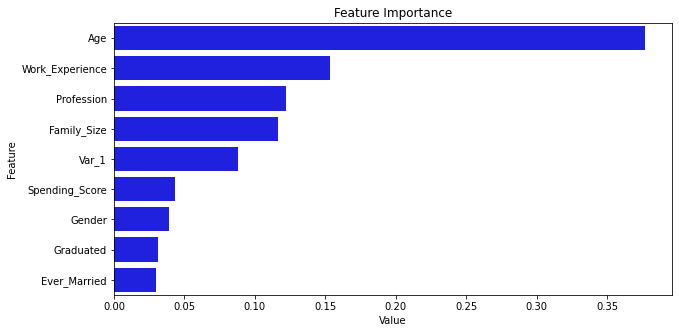

In [56]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)),columns=['Value','Feature'])

plt.figure(figsize=(10,5))
sns.barplot(x='Value',y='Feature',data=feature_imp.sort_values(by='Value',ascending=False),color='blue')
plt.title('Feature Importance')
plt.show();

Compares the variables most correlated with the response variable vs the most important variables according to the Random Forest

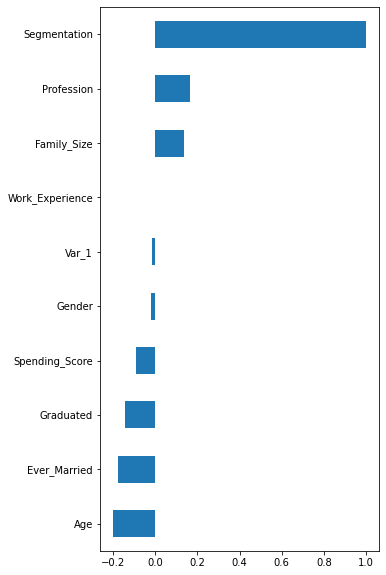

In [57]:
corr_matrix = data.corr()
plt.figure(figsize=(5,10))
corr_matrix['Segmentation'].sort_values(ascending=True).plot(kind='barh');

In [58]:
corr_matrix['Segmentation'].abs().sort_values()[0:1].index

Index(['Work_Experience'], dtype='object')

In [59]:
#Check how the model performs without the Work_Experience feature

X_train_2 = X_train.drop(columns=corr_matrix['Segmentation'].abs().sort_values()[0:1].index)
X_test_2 = X_test.drop(columns=corr_matrix['Segmentation'].abs().sort_values()[0:1].index)

In [61]:
#n_estimators = 50

#Instance classifier
model = RandomForestClassifier(n_estimators=50,random_state=42,oob_score=True)
model.fit(X_train_2,y_train)

#Prediction
y_pred = model.predict(X_test_2)
y_pred_proba = model.predict_proba(X_test_2)

#Metrics
print("OOB Score: {:.2f}".format(model.oob_score_))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred,average='micro')))

OOB Score: 0.42
Accuracy: 0.41
Precision: 0.41
Recall: 0.41


### Overview of the tree

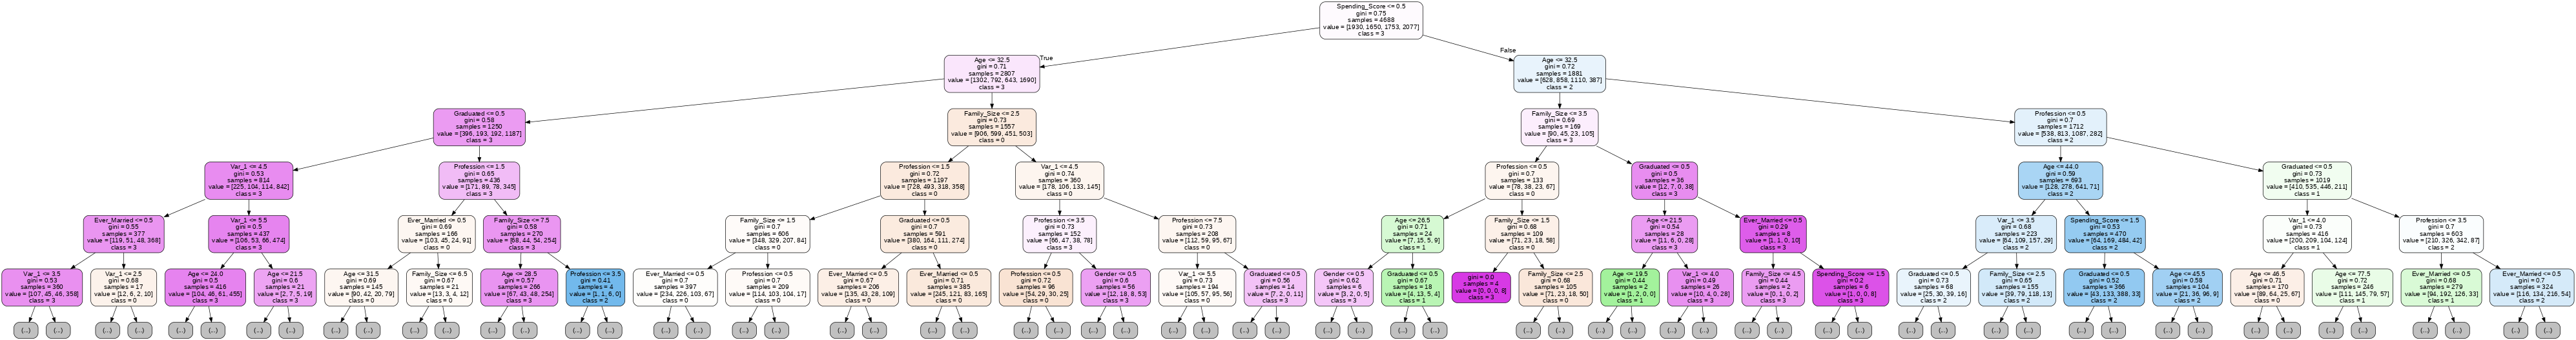

In [67]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(model.estimators_[0], out_file='tree.dot', 
                feature_names = X.drop(columns=corr_matrix['Segmentation'].abs().sort_values()[0:1].index).columns,
                class_names = ['0', '1','2','3'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=5)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

# Display
from IPython.display import Image
Image(filename = 'tree.png')